# __Credit Card Fraudulent Transactions Classification__

## __Discussion__ - 

**The Banking and Finance Industry** uses **_Data Science_ and _Machine Learning_** for various use cases such as Detection of Fraudulent Transactions , Customer Lifetime Value Predictions , Risk Modelling , Personalised Marketing and several others.<br> __Check them Out Here:__  <https://activewizards.com/blog/top-9-data-science-use-cases-in-banking/><br> In this Hands-On Lab Session we shall create Machine Learning Models that solve the essential and complex problem of Fraud Detection in Transactions to empower the Industry with **Real-Time Classification of Fraud**.Latest Machine Learning Techniques can help to solve this problem with a decent level of accuracy and in a very short time span.

This dataset............

## __Plan of Action__ - 
Let's structure and Plan the Methodology to go about solving this problem - 

- Brainstorming on why this problem MUST BE SOLVED and the impact of a great solution to the Industry

- Understading the Data , Exploring it's length , breadth and height ( How BIG , How DIVERSE , How GRANULAR )   Called : __EDA__

- __Visualisation of Data for Finding any specific Pattern or Flaw in the Data that can effect the Model__

- Finding the Complexities and Roadblocks for Modelling this particular Use Case

- Solving Use Case Specific Problems and consequently Handling Errors , Outliers and Missing Values in the Data

- Processing and Cleaning the Data to make it fit for Modelling and feeding to a Machine Learning Model

- Splitting the Dataset into Training and Testing Datasets

- Training the data on Multiple Classification Models

- Evaluating Models based on various Metrics and Understanding which metric is the most appropriate for Model Evaluation

- Lastly , disucssion on further ways to improve the model , feedback mechanism for the model and saving the model for future use


<img src="image.jpg" title="Online Credit Card Fraud" />

# Goals and Business Requirements for the Project 

In [5]:
# Write down your thoughts here -

#Brainstorming on why this problem MUST BE SOLVED and the impact of a great solution to the Industry

As mentioned before, the datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It is one of the unique datasets containing an unbalanced data of fraudulent and legitimate transactions.

#why this problem needs to be solved -
This problem is used to model past credit card transactions which are known to be fraud. It is then used to identify whether a new transaction is fraudulent or not. We are here to detect 100% of the fraudulent transactions while minimizing the incorrect fraud classifications.

#the impact of a great solution to the Industry-
'Fraud' in credit card transactions is unauthorized and unwanted usage of an account by someone other than the
owner of that account.
Fraud detection involves monitoring the activities of populations of users in order to estimate, perceive or avoid
objectionable behavior, which consist of fraud, intrusion, and defaulting.
This is a very relevant problem that demands the attention of communities such as machine learning and data science where the solution to this problem can be automated.






#Understading the Data , Exploring it's length , breadth and height ( How BIG , How DIVERSE , How GRANULAR ) Called : EDA
2.Exploring it's length- Rows(284807), Columns(31)


Q - Based on the dataset that we have now , what analysis do you wish to conduct ?

In [1]:
# import all the basic libraries
import numpy as np #provides high-performance multidimensional array with manipulation tool
import pandas as pd #Python-based data analysis toolkit
import matplotlib.pyplot as plt #plotting library for the Python and its numerical mathematics extension NumPy.
import seaborn as sns #Python data visualization library based on matplotlib
import math #To use mathematical functions
import matplotlib
import datetime #supplies classes for manipulating dates and times.
import sklearn #most useful library for machine learning and statistical modelling
import scipy #uses NumPy for more mathematical functions
import warnings #provided to warn the developer of situations that aren’t necessarily exceptions
warnings.filterwarnings('ignore')

In [2]:
#get the versions
!python --version
print(f"Pandas.version : Pandas {pd.__version__}")
print(f"Matplotlib.version : Matplotlib {matplotlib.__version__}")
print(f"Numpy.version : Numpy {np.__version__}")
print(f"Seaborn.version : Seaborn {sns.__version__}")
print(f"Scipy.version : Scipy {scipy.__version__}")
print(f"Skklearn.version : Sklearn {sklearn.__version__}")

Python 3.8.3
Pandas.version : Pandas 1.0.5
Matplotlib.version : Matplotlib 3.2.2
Numpy.version : Numpy 1.18.5
Seaborn.version : Seaborn 0.10.1
Scipy.version : Scipy 1.5.0
Skklearn.version : Sklearn 0.23.1


# STEP 1- DATA COLLECTION

In [4]:
#import the dataset
cc = pd.read_csv("creditcard.csv")

In [5]:
#top 5 dataset
pd.set_option('display.max_columns',100) #used to make all the columns visible, use max_rows for row visibility
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#bottom 5 dataset
cc.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
#length of the dataset
cc.shape

(284807, 31)

# STEP 2- DATA PREPARATION

## Part-1 Data Description

In [3]:
#check for different column names
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
#sample dataset
cc.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
215981,140304.0,1.700910,-0.515304,-0.512336,1.446638,-0.207479,0.474428,-0.276909,0.205677,0.893279,0.098522,0.447183,1.406483,-0.278338,-0.053571,-1.813820,-0.255492,-0.253502,-0.429408,0.400275,-0.060785,-0.411538,-1.177249,0.385215,0.623197,-0.385321,-1.165846,0.030536,-0.016505,105.98,0
88347,62101.0,-0.505975,0.822155,0.455688,0.127137,-0.502624,-0.864967,0.652338,0.350483,-0.849458,-0.446474,1.069195,0.288721,-1.088731,1.036412,-0.123324,0.251253,-0.267019,0.296899,0.158037,-0.088687,0.185438,0.187364,0.181686,0.523048,-0.264937,0.232183,-0.160878,-0.039342,85.25,0
259387,159092.0,2.041973,-0.068182,-1.165958,0.219952,0.121100,-0.692400,0.114281,-0.200243,0.216412,0.225604,0.770043,1.328498,0.612046,0.338115,-0.700324,0.157401,-0.687951,-0.340701,0.552150,-0.165649,-0.251838,-0.598349,0.281181,-0.320192,-0.266399,0.196341,-0.071235,-0.072085,1.98,0
209543,137610.0,1.498333,-1.200555,-2.565728,0.137949,0.498964,-0.059133,0.605824,-0.125968,0.696153,-0.038515,-0.360053,-0.349388,-1.910876,1.177366,0.067649,0.061649,-0.859277,0.892336,0.663139,0.335669,0.253132,0.026411,-0.354209,-0.377279,0.320287,-0.533194,-0.092115,-0.021237,325.79,0
10696,18095.0,-3.283809,-3.201727,2.548541,0.529802,3.646892,-1.776996,-1.952892,0.425505,1.605334,-0.706189,1.561888,-2.188992,0.210787,1.536071,-1.465945,-0.071123,0.448012,0.012241,-0.315466,0.837433,-0.172542,-1.206066,0.557550,-0.413534,0.209393,0.081816,-0.323694,-0.113667,30.50,0
37032,38779.0,0.991049,-1.122507,-0.675888,-1.113145,1.120425,3.732118,-1.086964,0.964626,0.809944,-0.326338,-0.301205,0.144416,0.143663,-0.200034,0.933078,0.734052,-0.702861,0.270081,0.384527,0.405849,0.098985,-0.070621,-0.185468,1.125408,0.232523,1.487641,-0.092005,0.030112,165.47,0
197523,132060.0,0.391731,-0.942754,-2.072752,0.734678,-0.749217,0.475891,2.214814,-0.400446,-0.259078,-0.027108,-1.588477,-1.102817,-0.702983,0.637901,1.187762,-1.085765,0.537831,0.374025,2.846758,1.205816,0.583930,1.059764,1.097079,0.163084,-0.732705,1.809677,-0.156813,0.053106,500.00,0
73055,54954.0,1.116498,0.290417,0.628576,1.186569,-0.187646,-0.299769,0.079625,-0.066148,-0.135303,-0.067404,0.077351,0.923130,1.115495,0.116584,1.174426,-0.003258,-0.298852,-0.929810,-0.711536,-0.040959,-0.221242,-0.640285,0.140919,0.055540,0.232398,-0.654701,0.046041,0.037180,34.00,0
1074,821.0,-1.026206,-0.454773,2.745089,-1.533086,-1.091166,-0.085628,0.062351,-0.065820,-0.886331,0.231772,0.970790,0.300761,0.135392,-0.683825,-0.643731,-0.933018,-0.491210,1.746260,-1.012147,-0.401264,-0.229040,0.025355,-0.014196,0.583596,0.073280,0.974510,-0.242234,-0.193198,82.50,0
70995,54110.0,1.228363,-0.154663,0.461158,-0.239120,-0.605993,-0.509623,-0.306561,0.008429,0.183887,-0.046418,1.147746,0.706114,-0.079075,0.347582,0.597862,0.709219,-0.722761,0.209852,0.437044,-0.018533,-0.095011,-0.345760,0.030516,0.061763,0.118376,0.905945,-0.079622,-0.001290,20.32,0


In [14]:
#check for the data types
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#Filtering the data into fraud and legit transactions
fraud = cc.loc[cc['Class']== 1] #filter the data on the basis of Class as Fraud
legit = cc.loc[cc['Class']== 0] #filter the data on the basis of Class as Fraud

print(f"total fraud : {len(fraud)}") #count of fraud data
print(f"total legit : {len(legit)}") #count of legit data

#check for outlier fraction
print(f"outlier_fraction : {len(fraud)/float(len(legit))}")

total fraud : 492
total legit : 284315
outlier_fraction : 0.0017304750013189597


## Part 2- Data Cleaning

#different types of data cleaning processes
check for missing data
check for duplicate values
check for outliers

# Step_1 of Data Cleaning - Deal with missing values

In [16]:
#check for missing values
data = cc[cc.columns[cc.isnull().any()]].isnull().sum()
for y in data:
    print(y)

In [17]:
cc[cc.columns[cc.isnull().any()]].isnull().sum() #returns all the null containing columns and the total number

Series([], dtype: float64)

### Outcome- No missing values present in the data

In [18]:
len(cc.isna().any())

31

# Step_2 of Data Cleaning - Deal with outliers


In [19]:
outliers =[]
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(y)
    return outliers        

In [20]:
#detection of outliers in the amount column
outliers_datapoints = detect_outliers(cc['Amount']) 
print(outliers_datapoints)

[1402.95, 1142.02, 919.6, 937.69, 3828.04, 937.69, 881.13, 1015.61, 986.31, 1602.99, 1528.9, 1736.0, 2452.03, 1376.13, 7712.43, 1127.78, 1109.2, 947.94, 3669.0, 888.62, 980.0, 1055.12, 1321.12, 2540.42, 2909.97, 1939.3, 850.15, 1399.2, 1068.62, 1043.56, 1480.0, 1447.71, 1455.37, 1176.22, 1650.0, 1000.0, 1769.69, 1129.1, 1169.47, 1461.84, 841.96, 1326.0, 1620.53, 938.0, 938.0, 1183.16, 1169.47, 897.28, 1114.02, 4002.88, 845.73, 855.15, 1034.35, 1809.68, 1055.0, 919.17, 1946.35, 1895.88, 1895.88, 950.82, 2746.34, 3995.92, 1228.99, 1408.29, 958.47, 1903.26, 984.0, 1744.08, 1140.0, 936.0, 948.59, 1008.99, 946.05, 1062.72, 2126.13, 1410.02, 884.0, 877.77, 867.76, 1264.35, 1218.89, 1209.52, 883.54, 860.6, 1326.33, 1912.89, 1912.89, 1002.0, 1000.0, 1002.0, 1284.64, 954.62, 1230.49, 875.92, 1350.0, 1555.23, 896.6, 1123.16, 1490.22, 1670.28, 935.57, 991.95, 1133.14, 888.52, 1576.44, 1638.04, 1262.93, 1678.88, 1227.14, 952.7, 1617.12, 1986.92, 1158.0, 961.42, 969.34, 2034.86, 1512.52, 1939.84, 8

### Outcome - Presence of Outliers in the dataset in the Amount column

In [6]:
#detection of outliers in the class column
outliers_datapoints = detect_outliers(cc['Class']) 
print(outliers_datapoints)

NameError: name 'detect_outliers' is not defined

### Outcome - Presence of Outliers in the dataset in the Class column

In [22]:
#check for outliers - part 1

def indices_of_outliers(x):
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3-q1
    lower_bound = q1 -(iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((x > upper_bound) | (x < lower_bound)) #limit has been set

In [23]:
q1, q3 = np.percentile(cc['Amount'], [25,75]) #considers the outliers as per the Amount column

In [24]:
indices_of_outliers(cc[cc['Class']==1]['Amount'])[0]

array([  1,  24,  43,  44,  75,  87, 103, 112, 120, 130, 132, 136, 144,
       163, 169, 182, 189, 195, 198, 201, 203, 210, 211, 212, 216, 218,
       222, 223, 224, 235, 236, 238, 243, 267, 268, 270, 279, 280, 281,
       282, 292, 299, 300, 322, 344, 355, 361, 372, 379, 380, 381, 382,
       384, 388, 390, 395, 400, 402, 406, 407, 415, 422, 448, 453, 454,
       470, 484, 486, 487], dtype=int64)

In [25]:
q1,q3

(5.6, 77.16499999999999)

In [26]:
iqr = q3-q1
print(iqr)

71.565


In [27]:
len(indices_of_outliers(cc[cc['Class']==1]['Amount'])[0]) # filter by Class as 1 ie fraud nos with outliers

69

In [28]:
list(indices_of_outliers(cc['Amount']))

[array([     2,     20,     51, ..., 284753, 284757, 284806], dtype=int64)]

In [29]:
len(indices_of_outliers(cc['Amount'])[0])

31904

In [30]:
list(indices_of_outliers(cc['Class']))

[array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
          6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
          6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
          6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
          8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
         10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
         11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
         14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
         15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
         15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
         17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
         26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
         30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
         40085,  40525,  41395,  41569,  41943,  42007,  42009, 

In [31]:
#Outlier removal part 2 #on the basis of a set max value as limit 
def outlier_removal(max_val):
    print("Values lost on thr basis of max based removal :{}".format(len(cc[(cc['Class']==0) & (cc['Amount']>max_val)])))
    print("proportion of data lost :{}".format(len(cc[(cc['Class']==0) & (cc['Amount']>max_val)])/len(cc)))
    
    temp_cc = cc[cc['Amount']< max_val] #outlier removed
    print(temp_cc['Class'].value_counts(normalize = True))

In [32]:
#check max for fraud transactions
cc[cc['Class']==1]['Amount'].max()

2125.87

In [33]:
outlier_removal(8000)

Values lost on thr basis of max based removal :12
proportion of data lost :4.213379586878132e-05
0    0.998272
1    0.001728
Name: Class, dtype: float64


In [34]:
outlier_removal(3000) #considering max value as 3000 set as limit of amount, count of how many data_rows are to be dropped

Values lost on thr basis of max based removal :284
proportion of data lost :0.0009971665022278245
0    0.998271
1    0.001729
Name: Class, dtype: float64


# Step_3 of Data Cleaning - Deal with the duplicate values

In [9]:
#check for duplicates
#cc.drop_duplicates() #after removing duplicates
len(cc[cc.duplicated()]) # total number of duplicates
print("total number of duplicates =",len(cc[cc.duplicated()]))

total number of duplicates = 1081


In [10]:
cc = cc.drop_duplicates()

In [37]:
cc.drop_duplicates(subset= 'Time')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [38]:
cc.shape

(283726, 31)

## Exploratory Data Analysis

In [39]:
cc.describe() # check for different statistics and metrics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [40]:
cc[['Time', 'Amount', 'Class']].describe().T #Time , Amount and Class wise statistics

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.0,54204.75,84692.5,139298.00,172792.00
Amount,283726.0,88.472687,250.399437,0.0,5.60,22.0,77.51,25691.16
Class,283726.0,0.001667,0.040796,0.0,0.00,0.0,0.00,1.00


# Different types of plots 

# Plot 1- Boxplot for the type of Transactions

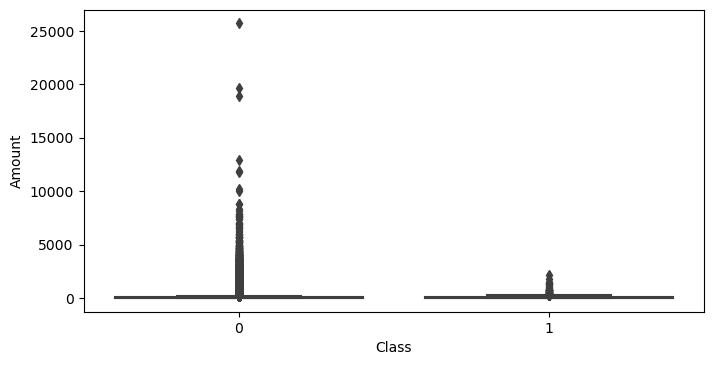

In [41]:
plt.figure(figsize= (8,4), dpi = 100) #helps to create a figure object
sns.boxplot(x = 'Class',  #the figure is chosen to be boxplot for the two Class variation ie, fraud and legit
             y = 'Amount',
             data = cc)
plt.show()

# Plot 2- Barplot for the type of Transactions

Text(0, 0.5, 'Frequency')

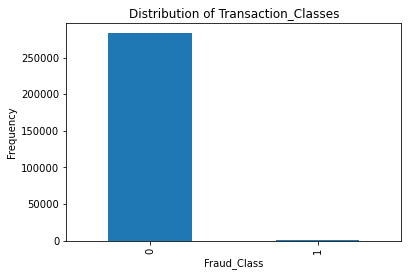

In [42]:
#distribution of classes
value =pd.value_counts(cc['Class'], sort =True)
value.plot(kind = 'bar')
plt.title("Distribution of Transaction_Classes")
plt.xlabel("Fraud_Class")
plt.ylabel("Frequency")

## Data is being divided into fraud and legit transactions

In [43]:
print("fraud(rows,columns)= ", fraud.shape, "\n"
      
      "legit(rows,columns)= ",legit.shape) #rows and columns of respective type of transactions

fraud(rows,columns)=  (492, 31) 
legit(rows,columns)=  (284315, 31)


In [44]:
print(fraud.Amount.describe()) #stats related to the fraud type transactions- Amount

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Time , Amount and Class - What can you do here ?

In [45]:
print(legit.Amount.describe()) #stats related to the legit type transactions- Amount

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## Plot 3 - Histogram plots of Amounts by Class of Transactions

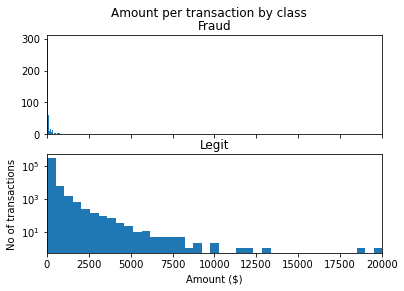

In [46]:
#transactions with respect to the amount in terms of histogram plots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('Legit')
plt.xlabel('Amount ($)')
plt.ylabel('No of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

## Plot 4 - Scatter plots of Time in secs w.r.t.Amounts by Class of Transactions

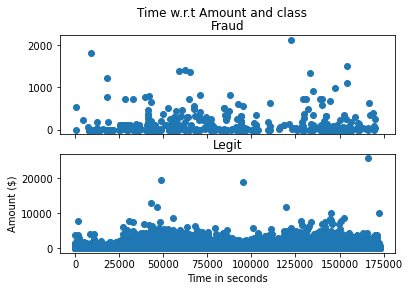

In [47]:
#transactions with respect to the amount in terms of scatter plots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time w.r.t Amount and class')
bins = 50
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Legit')
plt.xlabel('Time in seconds')
plt.ylabel('Amount ($)')
plt.show()


## Plot 5- Distribution plots for fraud and legit transactions on the basis of Time as hour

In [48]:
#convert time into hour
cc['hour']= cc['Time']/(60*60)

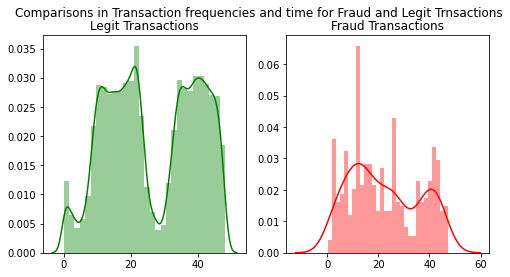

In [49]:
# time plots
fig,axs = plt.subplots(1,2, figsize = (8,4)) #created a subplot with rows = 1 n columns = 2
#using distribution plot ,where we have filtered using class - 0 for legit transactions, 
#                                       considered the hours' column with the values of the same
sns.distplot(cc[cc['Class']==0]['hour'].values, color ='green', bins = 30, ax = axs[0]) #here ax is used from matplotlib
axs[0].set_title("Legit Transactions") # setting axs[0] for the legit transaction

sns.distplot(cc[cc['Class']==1]['hour'].values, color ='red', bins = 30, ax = axs[1]) #here ax is used from matplotlib
axs[1].set_title("Fraud Transactions") # setting axs[0] for the fraud transaction

fig.suptitle('Comparisons in Transaction frequencies and time for Fraud and Legit Trnsactions')
plt.show()

## Plot 6- Visualising all the data in histogram plots to find all the anomalies

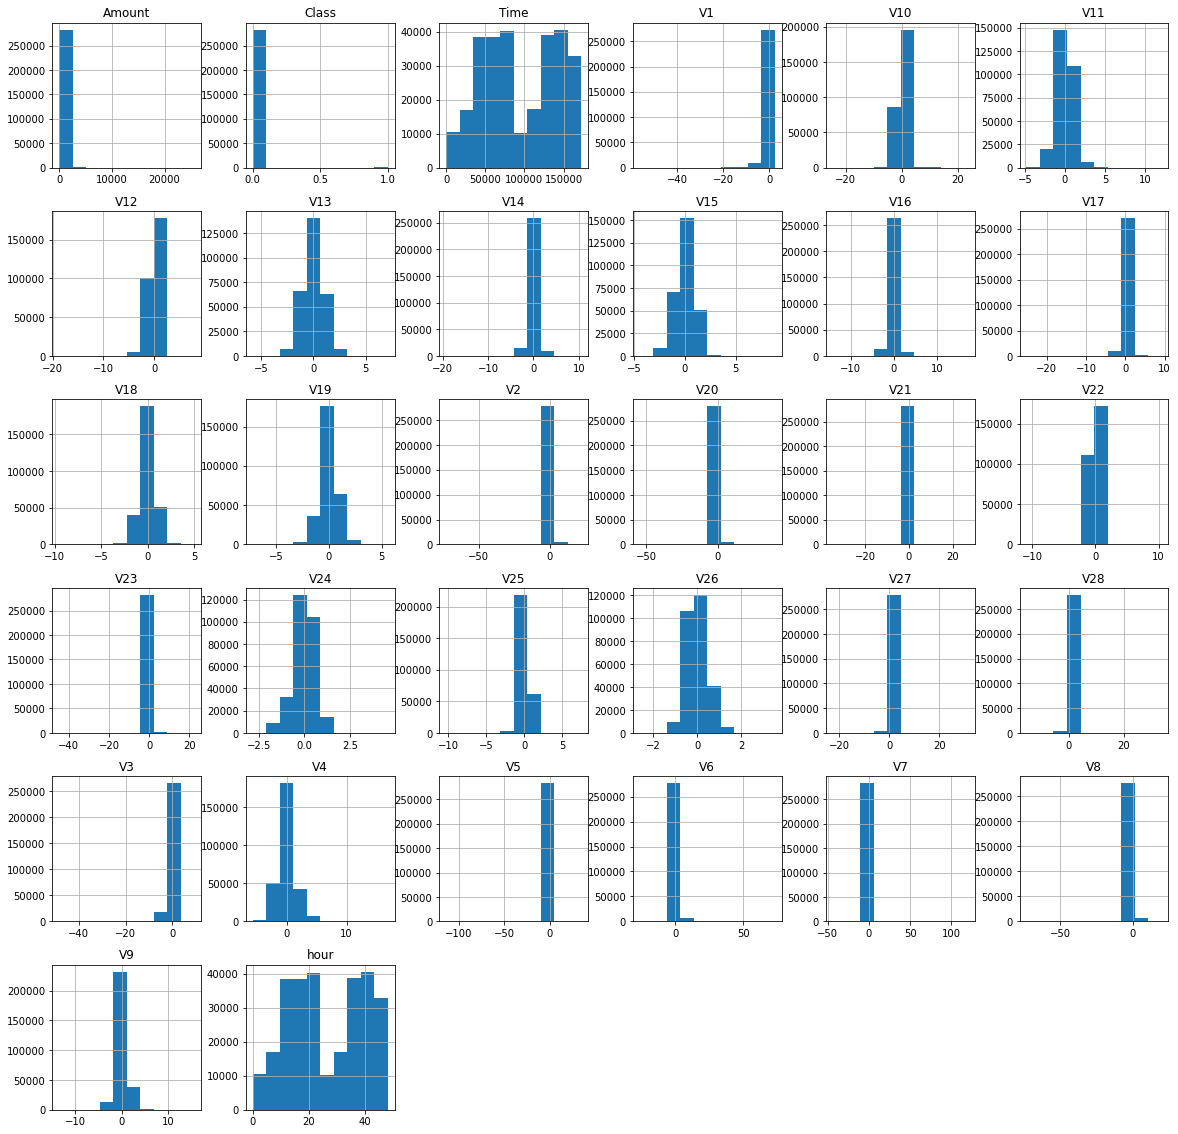

In [50]:
cc.hist(figsize= (20,20))
plt.show()

## Plot 7- Correlation plot to check correlation between the variables

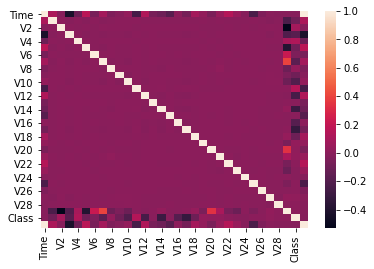

In [51]:
#Check for Heatmap using correlation
cc.corr()
sns.heatmap(cc.corr())

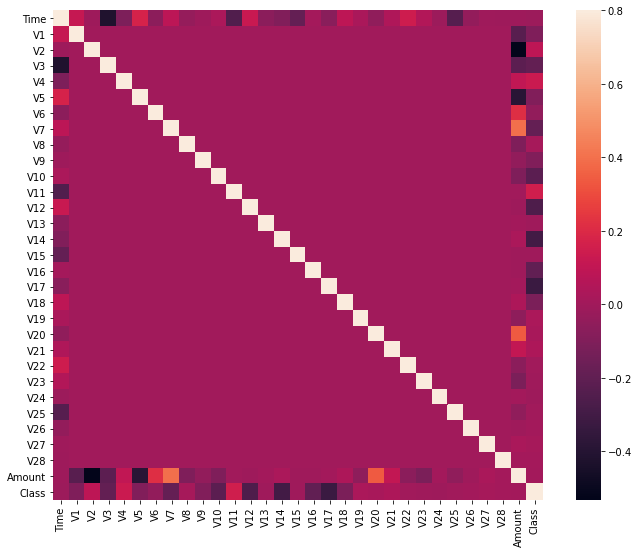

In [6]:
# Correlation matrix 
corrmat = cc.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

## Plot 8- Boxplot of all the variables

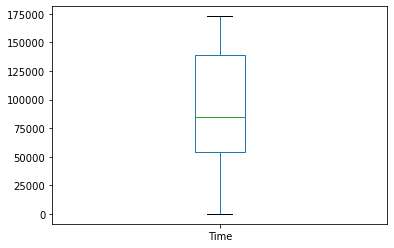

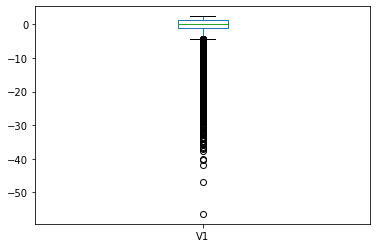

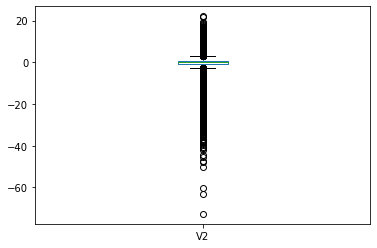

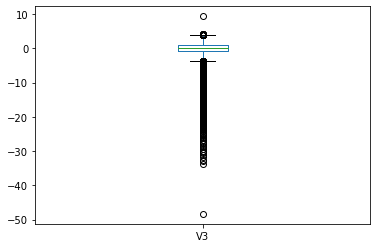

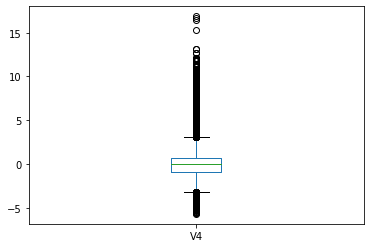

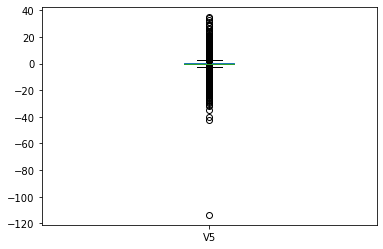

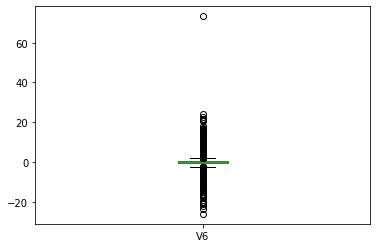

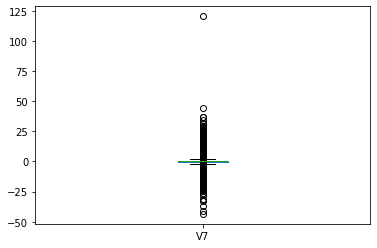

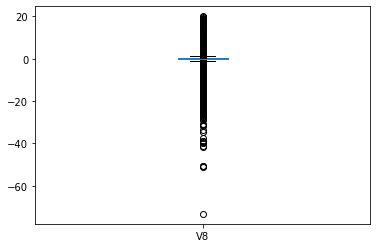

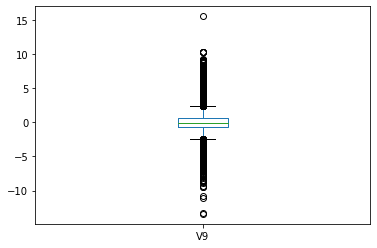

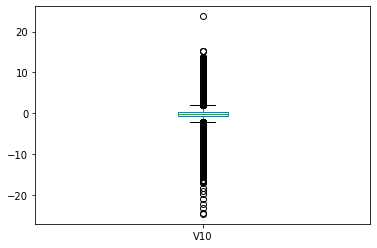

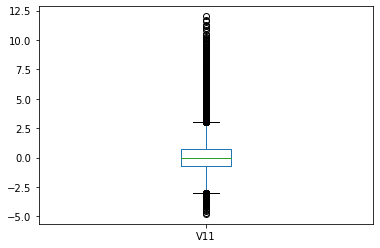

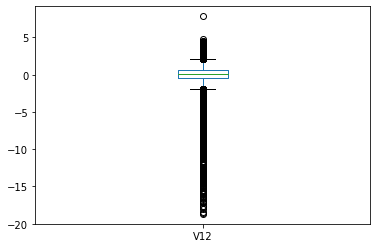

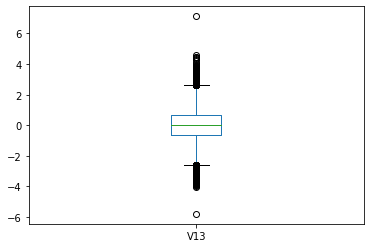

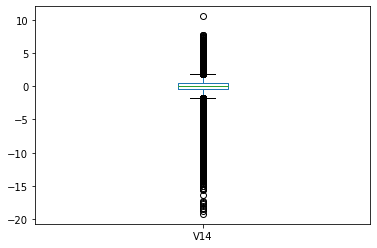

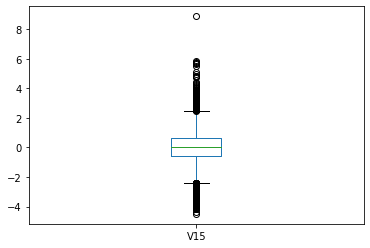

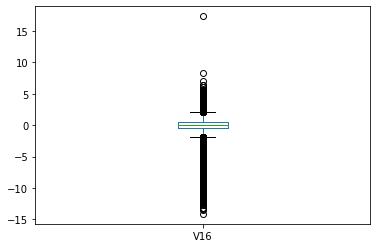

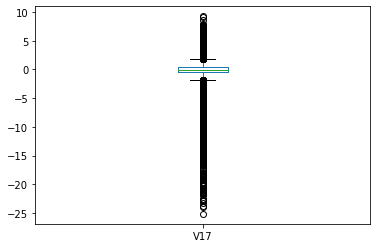

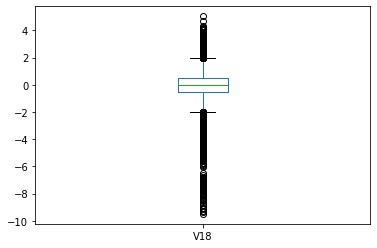

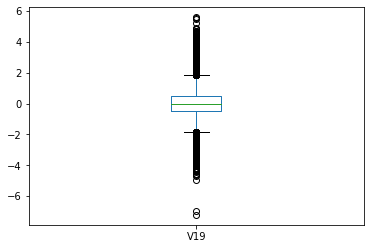

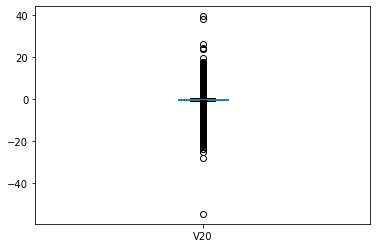

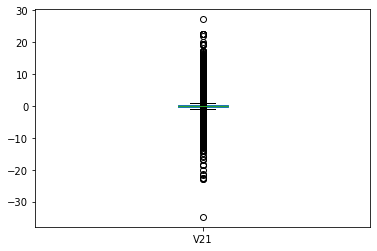

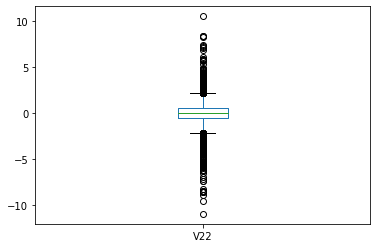

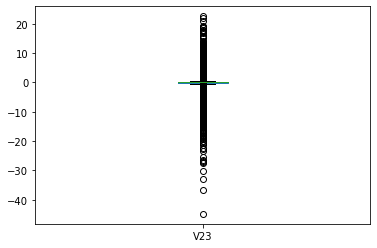

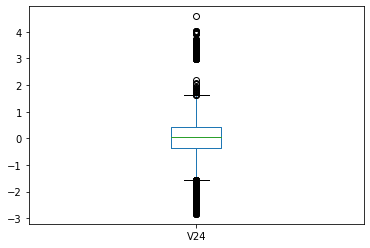

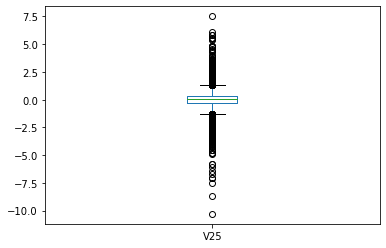

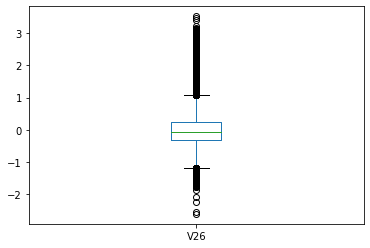

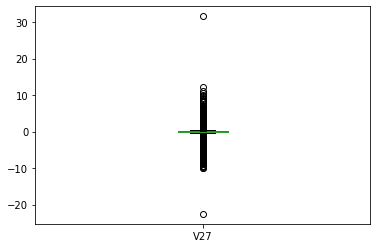

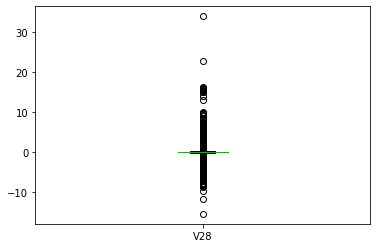

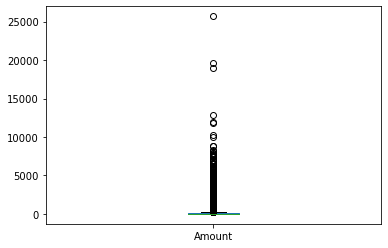

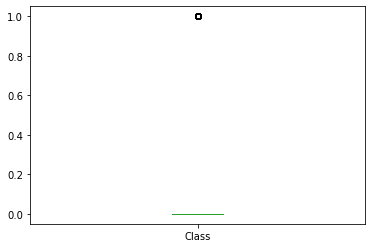

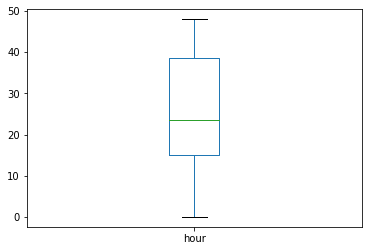

In [52]:
for col in cc.columns:
    plt.figure()
    cc[col].plot(kind = 'box')

In [53]:
#analyse certain functions- get full arguments related to them
import inspect

In [54]:
inspect.getfullargspec(pd.value_counts)

FullArgSpec(args=['values', 'sort', 'ascending', 'normalize', 'bins', 'dropna'], varargs=None, varkw=None, defaults=(True, False, False, None, True), kwonlyargs=[], kwonlydefaults=None, annotations={'return': 'Series', 'sort': <class 'bool'>, 'ascending': <class 'bool'>, 'normalize': <class 'bool'>, 'dropna': <class 'bool'>})

In [55]:
cc['Class'].value_counts(normalize = True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

# Observations
1. V1-V28 are results fom PCA or rather they are PCA component- columns
2. Class columns has two values 0- legit and 1- fraud
3. Range of Amount category is more for Legit transactions than fraudulent ones
4. Time column represents difference between timestamps of a transaction and the first transaction
5. Amount is a continuous data column
6. Class is a dicrete column

In [56]:
# check for per hour transactions on the basis of amount and class
cc['hour'] = cc['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
cc.pivot_table(values= 'Amount',index='hour',columns='Class',aggfunc='count')

Class,0,1
hour,,
0.0,10868,17
1.0,7639,6
2.0,4200,10
3.0,3258,48
4.0,3471,17
5.0,2180,23
6.0,2977,11
7.0,4074,9
8.0,7209,23


# STEP- 4-Choosing a Model

# STEP- 5-Training the Model

### 1.Splitting the data as per the features and target variables 

In [1]:
len(cc.columns) #as a new column with hours' data is being added to the dataset

NameError: name 'cc' is not defined

In [11]:
#get all the columns in terms of list
columns = cc.columns.tolist() 
#filter the columns we do not want
columns = [c for c in columns if c not in ["Class"]]
#filtered out all the columns using a for loop to consider all except the 'Class' column
#created a target variable where we have placed all the data related to 'Class' column
target = "Class"
#Splitting data into feature and target variables
state = np.random.RandomState(42)
y = cc[target]
x = cc[columns]
x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
#check for the shape of the individual categories
print(x.shape)
print(y.shape)

(283726, 30)
(283726,)


In [2]:
#importing most important machine learning package
import sklearn.metrics

In [13]:
#import the classes associated with the modules required for training the dataset
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 2.Splitting the data into train and test variables

In [14]:
#Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)

### Check for Class imbalance
As we can witness, that there has been quite an imbalance in the transaction data based on Class ie,

total fraud : 492

total legit : 284315

Hence, in order to reduce such class imbalance, we must opt for two processes
1. Random Over Sampling
2. Random Under Sampling


In [15]:
#to deal with sampling techniques, we need to install the following package
!pip install imblearn

In [16]:
#Install the modules associated with this package
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [17]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification # to generate a random n class classification problem

#x, y = make_classification(n_classes=2) #, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 283253, 1: 473})


### RANDOM UNDER SAMPLING

In [20]:
#Use of random under sampling method 
rus = RandomUnderSampler(random_state=42)

x_rus, y_rus = rus.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_rus))

Resampled dataset shape Counter({0: 473, 1: 473})


### RANDOM OVER SAMPLING

In [21]:
#Use of random over sampling method 
ros = RandomOverSampler(random_state= 42)

x_ros, y_ros = ros.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({0: 283253, 1: 283253})


### SMOTE

In [22]:
#Use of random over sampling method 
ros1 = SMOTE(random_state= 42)

x_ros1, y_ros1 = ros.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_ros1))

Resampled dataset shape Counter({0: 283253, 1: 283253})


In [68]:
#define a matrix for all evaluation
#metrics = pd.DataFrame(index= ['accuracy','precision','recall'],
                     # columns= ['NULL','log_reg','class_tree','Naive_bayes'])

# Model Selection and Training the Model

# Classifier 1 - Logistics Regression

In [18]:
#import the regression module
from sklearn.linear_model import LogisticRegression

In [1]:
#1. Logistic Regression 
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

#train the model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

#predict the model
y_pred = log_reg.predict(x_test)

#check for the accuracy score
print(f"Accuracy_Score_of_Logistic_Regression: {accuracy_score(y_pred, y_test)}")

NameError: name 'train_test_split' is not defined

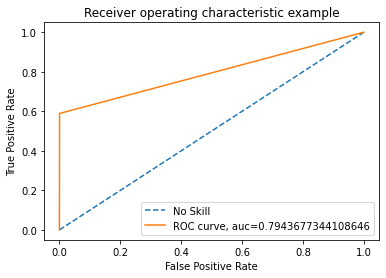

In [70]:
# predict probabilities
yhat = log_reg.predict_proba(x_test)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test,  y_pred) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc = roc_auc_score(y_test, y_pred) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### FACTS
we can observe here that the model Accuracy score and roc_auc_score are no way similiar in terms of values.
we can expect that the high accuracy score is because of high imbalance dataset

In [71]:
#check for the confusion matrix
Confusion_Matrix = confusion_matrix(y_test,y_pred)
print(Confusion_Matrix)

[[84954    35]
 [   53    76]]


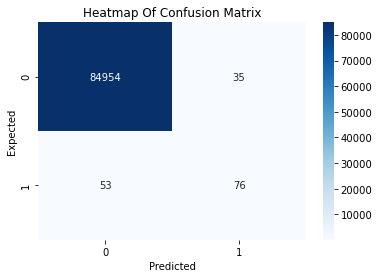

In [72]:
#create the heatmap of the confusion matrix
sns.heatmap(pd.DataFrame(Confusion_Matrix), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Heatmap Of Confusion Matrix')
plt.show()

In [20]:
#check for the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.77      0.53      0.63       129

    accuracy                           1.00     85118
   macro avg       0.89      0.76      0.81     85118
weighted avg       1.00      1.00      1.00     85118



#### 1.1 Machine Learning Model - Logistic Regression - using Random under sampler

In [50]:
#1. Logistic Regression using Random Under Sampling Method
x_train_ru,x_test_ru,y_train_ru,y_test_ru = train_test_split(x_rus,y_rus, test_size = 0.3, random_state = 0)

#train the model
log_reg = LogisticRegression()
log_reg.fit(x_train_ru, y_train_ru)

#predict the model
y_pred_ru = log_reg.predict(x_test_ru)

#check for the accuracy score
print(f"Accuracy_Score_of_Logistic_Regression(RUS) : {accuracy_score(y_pred_ru, y_test_ru)}")

NameError: name 'LogisticRegression' is not defined

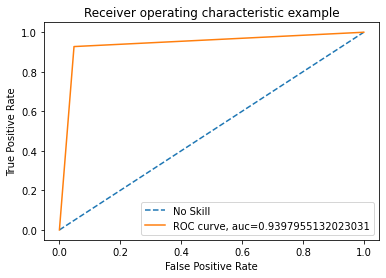

In [20]:
# predict probabilities
yhat_ru = log_reg.predict_proba(x_test_ru)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_ru = yhat_ru[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_ru,  y_pred_ru) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_ru = roc_auc_score(y_test_ru, y_pred_ru) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_ru))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 1.2 Machine Learning Model - Logistic Regression - using Random Over sampler

In [17]:
#2. Logistic Regression using Random Over Sampling Method
x_train_ro,x_test_ro,y_train_ro,y_test_ro = train_test_split(x_ros,y_ros, test_size = 0.3, random_state = 0)

#train the model
log_reg = LogisticRegression()
log_reg.fit(x_train_ro, y_train_ro)

#predict the model
y_pred_ro = log_reg.predict(x_test_ro)

#check for the accuracy score
print(f"Accuracy_Score_of_Logistic_Regression(ROS) : {accuracy_score(y_pred_ro, y_test_ro)}")

Accuracy_Score_of_Logistic_Regression(ROS) : 0.9377942007154961


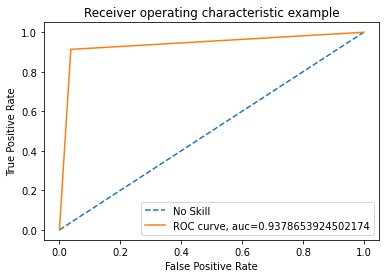

In [22]:
# predict probabilities
yhat_ro = log_reg.predict_proba(x_test_ro)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_ro = yhat_ro[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_ro,  y_pred_ro) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_ro = roc_auc_score(y_test_ro, y_pred_ro) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_ro))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

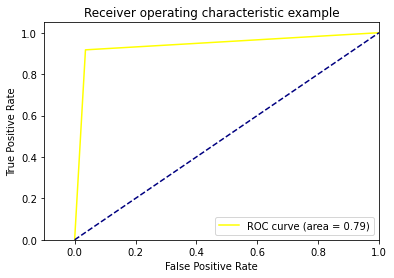

In [78]:
plt.figure()
plt.plot(fpr, tpr, color='yellow',
          label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.10, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### 1.3 Machine Learning Model - Logistic Regression - using Random  Over sampler (SMOTE)

In [26]:
#2. Logistic Regression using Random Over Sampling Method(SMOTE)
x_train_ro2,x_test_ro2,y_train_ro2,y_test_ro2 = train_test_split(x_ros1,y_ros1, test_size = 0.3, random_state = 0)

#train the model
log_reg = LogisticRegression()
log_reg.fit(x_train_ro2, y_train_ro2)

#predict the model
y_pred_ro2 = log_reg.predict(x_test_ro2)

#check for the accuracy score
print(f"Accuracy_Score of ROS using SMOTE : {accuracy_score(y_pred_ro2, y_test_ro2)}")

Accuracy_Score of ROS using SMOTE : 0.9377942007154961


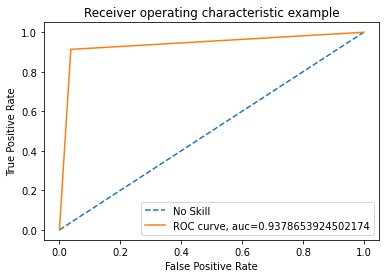

In [27]:
# predict probabilities
yhat_ro2 = log_reg.predict_proba(x_test_ro2)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_ro2 = yhat_ro2[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_ro2,  y_pred_ro2) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_ro2 = roc_auc_score(y_test_ro2, y_pred_ro2) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_ro2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [ ]:
1. Class - 0 , 1 
2. Amount - Continous Data Column
3. Class and Amount  - after normalising
4. Time and Amount - Night or Day time Fraud high or low
5. Skewness of the Amount column
6. 
7.
8.
9.
10.


#### 1.4 Machine Learning Model - Logistic Regression - using Random Over sampler (ADASYN)

In [25]:
#Use of random over sampling method 
ada = ADASYN(random_state= 42)

x_ada, y_ada = ada.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_ada))

Resampled dataset shape Counter({1: 283299, 0: 283253})


In [26]:
# Logistic Regression using Random Over Sampling Method(ADASYN)
x_train_ro3,x_test_ro3,y_train_ro3,y_test_ro3 = train_test_split(x_ada,y_ada, test_size = 0.3, random_state = 0)

#train the model
log_reg = LogisticRegression()
log_reg.fit(x_train_ro3, y_train_ro3)

#predict the model
y_pred_ro3 = log_reg.predict(x_test_ro3)

#check for the accuracy score
print(f"Accuracy_Score of ROS using ADASYN : {accuracy_score(y_pred_ro3, y_test_ro3)}")

Accuracy_Score of ROS using ADASYN : 0.9561206358918842


In [ ]:
# predict probabilities
yhat_ro3 = log_reg.predict_proba(x_test_ro3)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_ro3 = yhat_ro3[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_ro3,  y_pred_ro3) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_ro3 = roc_auc_score(y_test_ro3, y_pred_ro3) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_ro3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='green',
          label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.10, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

1. Try to see which columns are affecting the fraud the most 
2. Predictive Modelling 

# Now applying different models and evaluating the dataset

In [21]:
!pip3 install xgboost

In [22]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier 

# Classifier 2 - Decision Tree Classifier

In [23]:
#use the train test split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.3, random_state=0)

#train the model
dte = DecisionTreeClassifier()
dte.fit(x_train_1, y_train_1)

#predict the model
y_pred_1 = dte.predict(x_test_1)

#check for the accuracy score
print(f"Accuracy_Score_of_Decision_Tree_Classifier : {accuracy_score(y_pred_1, y_test_1)}")

Accuracy_Score_of_Decision_Tree_Classifier : 0.9991893606522709


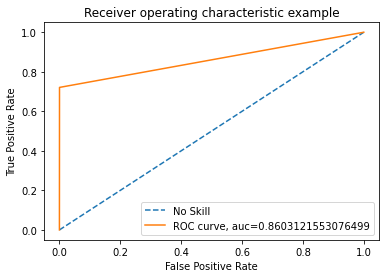

In [20]:
# predict probabilities
yhat_1 = dte.predict_proba(x_test_1)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_1 = yhat_1[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_1,  y_pred_1) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc = roc_auc_score(y_test_1, y_pred_1) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

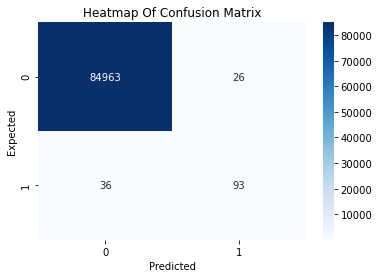

In [21]:
#create the heatmap of the confusion matrix
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_1,y_pred_1)), annot = True, cmap = 'Blues', fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Heatmap Of Confusion Matrix')
plt.show()

In [22]:
#check for the classification report
print(classification_report(y_test_1,y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.78      0.72      0.75       129

    accuracy                           1.00     85118
   macro avg       0.89      0.86      0.87     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
cnf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot = True, cmap = 'Blues' ,fmt = 'd')
x.label= 'Predicted'
y.label = 'Expected'
plt.show()

#### 2.1 Machine Learning Model - Decision Tree Classifier - using Random Under sampler

In [23]:
#use the train test split
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)

#train the model
dte = DecisionTreeClassifier()
dte.fit(x_train_2, y_train_2)

#predict the model
y_pred_2 = dte.predict(x_test_2)

#check for the accuracy score
print(f"Accuracy_Score of Decision Tree Classifier(RUS) : {accuracy_score(y_pred_2, y_test_2)}")

Accuracy_Score of Decision Tree Classifier(RUS) : 0.8626760563380281


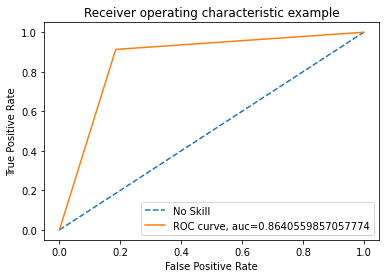

In [24]:
# predict probabilities
yhat_2 = dte.predict_proba(x_test_2)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_2 = yhat_2[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_2,  y_pred_2) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_2 = roc_auc_score(y_test_2, y_pred_2) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [25]:
#check for the classification report
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       146
           1       0.82      0.91      0.87       138

    accuracy                           0.86       284
   macro avg       0.87      0.86      0.86       284
weighted avg       0.87      0.86      0.86       284



#### 2.2 Machine Learning Model - Decision Tree Classifier - using Random Over sampler

In [20]:
#use the train test split
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_ros, y_ros, test_size=0.3, random_state=0)

#train the model
dte = DecisionTreeClassifier()
dte.fit(x_train_3, y_train_3)

#predict the model
y_pred_3 = dte.predict(x_test_3)

#check for the accuracy score
print(f"Accuracy_Score_of_Decision_Tree_Classifier(ROS) : {accuracy_score(y_pred_3, y_test_3)}")

Accuracy_Score_of_Decision_Tree_Classifier(ROS) : 0.9997057992845039


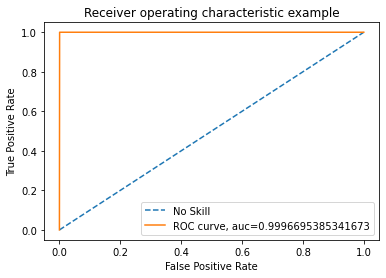

In [28]:
# predict probabilities
yhat_3 = dte.predict_proba(x_test_3)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_3 = yhat_3[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_3,  y_pred_3) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_3 = roc_auc_score(y_test_3, y_pred_3) #should we be using predicetd value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_3))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [ ]:
#check for the classification report
print(classification_report(y_test_3,y_pred_3))

In [ ]:
# Questions ?

#1. When do most transactions happen , time ?
#2. Are fraudulent transactions of higher value than genuine ones?
#3. Which columns are significant ?

# Classifier 3 - Random forest Classifier

In [20]:
#use the train test split
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(x, y, test_size=0.3, random_state=0)

#train the model
rfc = RandomForestClassifier()
rfc.fit( x_train_4, y_train_4 )
#predict the model
y_pred_4 = rfc.predict(x_test_4)

#check for the accuracy score
print(f"Accuracy_Score_of_Random_Forest_Classifier : {accuracy_score(y_pred_4, y_test_4)}")

Accuracy_Score_of_Random_Forest_Classifier : 0.9995535609389319


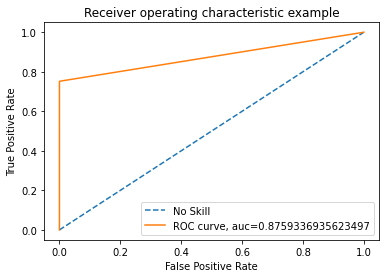

In [21]:
# predict probabilities
yhat_4 = rfc.predict_proba(x_test_4)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_4 = yhat_4[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_4,  y_pred_4) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_4 = roc_auc_score(y_test_4, y_pred_4) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_4))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 3.1 Machine Learning Model - Random Forest Classifier - using Random Under sampler 

In [22]:
#use the train test split
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
#train the model
rfc = RandomForestClassifier()
rfc.fit( x_train_5, y_train_5 )
#predict the model
y_pred_5 = rfc.predict(x_test_5)

#check for the accuracy score
print(f"Accuracy_Score_of_Random_Forest_Classifier(RUS) : {accuracy_score(y_pred_5, y_test_5)}")

Accuracy_Score_of_Random_Forest_Classifier(RUS) : 0.9401408450704225


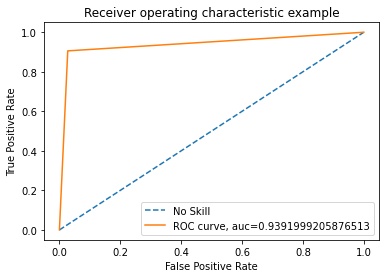

In [23]:
# predict probabilities
yhat_5 = rfc.predict_proba(x_test_5)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_5 = yhat_5[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_5,  y_pred_5) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_5 = roc_auc_score(y_test_5, y_pred_5) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 3.2 Machine Learning Model - Random Forest Classifier - using Random Over sampler 

In [21]:
#use the train test split
x_train_6, x_test_6, y_train_6, y_test_6 = train_test_split(x_ros, y_ros, test_size=0.3, random_state=0)
#train the model
rfc = RandomForestClassifier()
rfc.fit( x_train_6, y_train_6 )
#predict the model
y_pred_6 = rfc.predict(x_test_6)

#check for the accuracy score
print(f"Accuracy_Score_of_Random_Forest_Classifier(ROS) : {accuracy_score(y_pred_6, y_test_6)}")

Accuracy_Score_of_Random_Forest_Classifier(ROS) : 0.9999293918282809


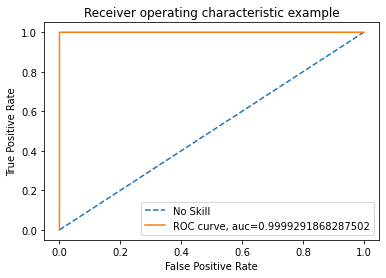

In [22]:
# predict probabilities
yhat_6 = rfc.predict_proba(x_test_6)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_6 = yhat_6[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_6,  y_pred_6) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_6 = roc_auc_score(y_test_6, y_pred_6) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_6))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [26]:
#check for the classification report
print(classification_report(y_test_6,y_pred_6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84730
           1       1.00      1.00      1.00     85222

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



### OUTCOME

# Classifier 4 -K Neighbours Classifier

In [27]:
#use the train test split
x_train_7, x_test_7, y_train_7, y_test_7 = train_test_split(x, y, test_size=0.3, random_state=0)
#train the model
knc =KNeighborsClassifier(n_neighbors=3)
knc.fit( x_train_7, y_train_7 )
#predict the model
y_pred_7 = knc.predict(x_test_7)

#check for the accuracy score
print(f"Accuracy_Score of K Neighbours Classifier : {accuracy_score(y_pred_7, y_test_7)}")

Accuracy_Score of K Neighbours Classifier : 0.9985314504570126


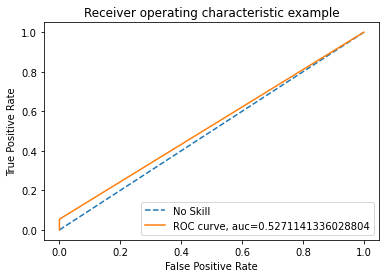

In [28]:
# predict probabilities
yhat_7 = knc.predict_proba(x_test_7)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_7 = yhat_7[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_7,  y_pred_7) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_7 = roc_auc_score(y_test_7, y_pred_7) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_7))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 4.1 Machine Learning Model - K Neighbouring Classifier - using Random Under sampler

In [29]:
#use the train test split
x_train_8, x_test_8, y_train_8, y_test_8 = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
#train the model
knc =KNeighborsClassifier(n_neighbors=3)
knc.fit( x_train_8, y_train_8 )
#predict the model
y_pred_8 = knc.predict(x_test_8)

#check for the accuracy score
print(f"Accuracy_Score of K Neighbours Classifier(RUS) : {accuracy_score(y_pred_8, y_test_8)}")

Accuracy_Score of K Neighbours Classifier(RUS) : 0.6267605633802817


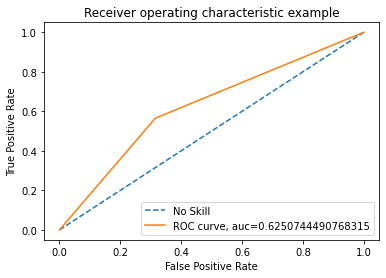

In [30]:
# predict probabilities
yhat_8 = knc.predict_proba(x_test_8)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_8 = yhat_8[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_8,  y_pred_8) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_8 = roc_auc_score(y_test_8, y_pred_8) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_8))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 4.2 Machine Learning Model - K Neighbouring Classifier - using Random Over sampler

In [23]:
#use the train test split
x_train_9, x_test_9, y_train_9, y_test_9 = train_test_split(x_ros, y_ros, test_size=0.3, random_state=0)
#train the model
knc =KNeighborsClassifier(n_neighbors=3)
knc.fit( x_train_9, y_train_9 )
#predict the model
y_pred_9 = knc.predict(x_test_9)

#check for the accuracy score
print(f"Accuracy_Score of K Neighbours Classifier(ROS) : {accuracy_score(y_pred_9, y_test_9)}")

Accuracy_Score of K Neighbours Classifier(ROS) : 0.9993998305403878


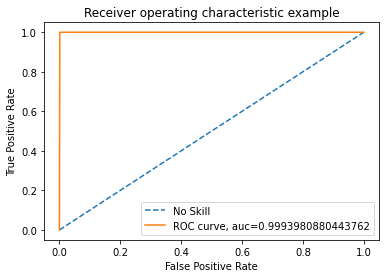

In [24]:
# predict probabilities
yhat_9 = knc.predict_proba(x_test_9)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_9 = yhat_9[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_9,  y_pred_9) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_9 = roc_auc_score(y_test_9, y_pred_9) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_9))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

### OUTCOME- 

# Classifier 5 -XGBOOST Classifier

In [33]:
#convert x, y dataset into an optimized data structure called Dmatrix that XGBoost supports and which increases productivity
#data_dmatrix = XGBClassifier.DMatrix(data=x,label=y)
#use the train test split
x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(x, y, test_size=0.3, random_state=0)
#train the model
xgbc =XGBClassifier(n_estimators=100)
xgbc.fit( x_train_10, y_train_10 )
#predict the model
y_pred_10 = xgbc.predict(x_test_10)

#check for the accuracy score
print(f"Accuracy_Score of XGBoost Classifier : {accuracy_score(y_pred_10, y_test_10)}")

[12:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy_Score of XGBoost Classifier : 0.9995653093352758


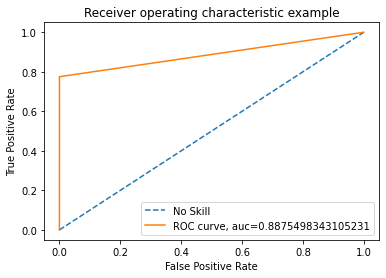

In [34]:
# predict probabilities
yhat_10 = xgbc.predict_proba(x_test_10)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_10 = yhat_10[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_10,  y_pred_10) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_10 = roc_auc_score(y_test_10, y_pred_10) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_10))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [35]:
#check for the classification report
print(classification_report(y_test_10,y_pred_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84989
           1       0.93      0.78      0.84       129

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



#### 5.1 Machine Learning Model - XGBoost Classifier - using Random Under sampler

In [36]:
#convert x, y dataset into an optimized data structure called Dmatrix that XGBoost supports and which increases productivity
#data_dmatrix = XGBClassifier.DMatrix(data=x,label=y)
#use the train test split
x_train_11, x_test_11, y_train_11, y_test_11 = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
#train the model
xgbc =XGBClassifier(n_estimators=100)
xgbc.fit( x_train_11, y_train_11 )
#predict the model
y_pred_11 = xgbc.predict(x_test_11)

#check for the accuracy score
print(f"Accuracy_Score of XGBoost Classifier(RUS) : {accuracy_score(y_pred_11, y_test_11)}")

[12:41:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy_Score of XGBoost Classifier(RUS) : 0.9401408450704225


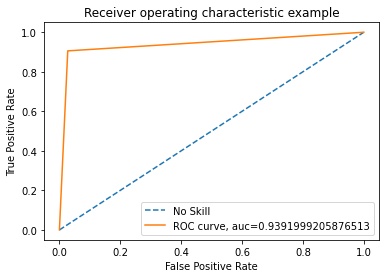

In [37]:
# predict probabilities
yhat_11 = xgbc.predict_proba(x_test_11)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_11 = yhat_11[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_11,  y_pred_11) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_11 = roc_auc_score(y_test_11, y_pred_11) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_11))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 5.2 Machine Learning Model - XGBoost Classifier - using Random Over sampler

In [25]:
#convert x, y dataset into an optimized data structure called Dmatrix that XGBoost supports and which increases productivity
#data_dmatrix = XGBClassifier.DMatrix(data=x,label=y)
#use the train test split
x_train_12, x_test_12, y_train_12, y_test_12 = train_test_split(x_ros, y_ros, test_size=0.3, random_state=0)
#train the model
xgbc =XGBClassifier(n_estimators=100)
xgbc.fit( x_train_12, y_train_12 )
#predict the model
y_pred_12 = xgbc.predict(x_test_12)

#check for the accuracy score
print(f"Accuracy_Score of XGBoost Classifier(ROS) : {accuracy_score(y_pred_12, y_test_12)}")

[01:40:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy_Score of XGBoost Classifier(ROS) : 0.9998882037281115


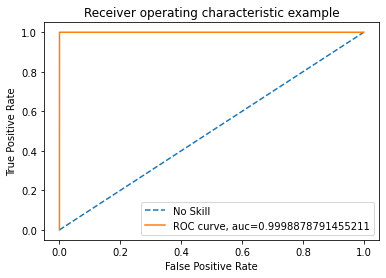

In [39]:
# predict probabilities
yhat_12 = xgbc.predict_proba(x_test_12)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_12 = yhat_12[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_12,  y_pred_12) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_12 = roc_auc_score(y_test_12, y_pred_12) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_12))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [40]:
#check for the classification report
print(classification_report(y_test_12,y_pred_12))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84730
           1       1.00      1.00      1.00     85222

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



# Classifier 6 -Naive Bayes Classifier


In [41]:
#use the train test split
x_train_13, x_test_13, y_train_13, y_test_13 = train_test_split(x, y, test_size=0.3, random_state=0)
#train the model
gnb = GaussianNB()

gnb.fit( x_train_13, y_train_13)
#predict the model
y_pred_13 = gnb.predict(x_test_13)

#check for the accuracy score
print(f"Accuracy_Score of Naive Bayes Classifier : {accuracy_score(y_pred_13, y_test_13)}")

Accuracy_Score of Naive Bayes Classifier : 0.9928804718155971


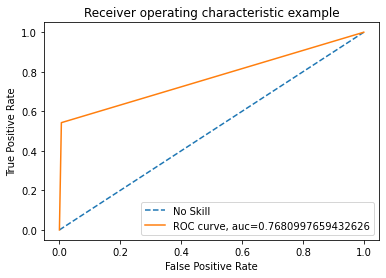

In [42]:
# predict probabilities
yhat_13 = gnb.predict_proba(x_test_13)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_13 = yhat_13[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_13,  y_pred_13) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_13 = roc_auc_score(y_test_13, y_pred_13) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_13))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 6.1 Machine Learning Model - Naive Bayes Classifier - using Random Under sampler

In [43]:
#use the train test split
x_train_14, x_test_14, y_train_14, y_test_14 = train_test_split(x_rus, y_rus, test_size=0.3, random_state=0)
#train the model
gnb = GaussianNB()

gnb.fit( x_train_14, y_train_14)
#predict the model
y_pred_14 = gnb.predict(x_test_14)

#check for the accuracy score
print(f"Accuracy_Score of Naive Bayes Classifier(RUS) : {accuracy_score(y_pred_14, y_test_14)}")

Accuracy_Score of Naive Bayes Classifier(RUS) : 0.8767605633802817


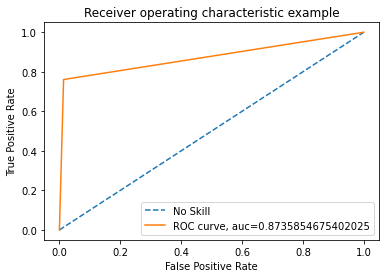

In [44]:
# predict probabilities
yhat_14 = gnb.predict_proba(x_test_14)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_14 = yhat_14[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_14,  y_pred_14) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_14 = roc_auc_score(y_test_14, y_pred_14) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_14))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

#### 6.2 Machine Learning Model - Naive Bayes Classifier - using Random Over sampler

In [26]:
#use the train test split
x_train_15, x_test_15, y_train_15, y_test_15 = train_test_split(x_ros, y_ros, test_size=0.3, random_state=0)
#train the model
gnb = GaussianNB()

gnb.fit( x_train_15, y_train_15)
#predict the model
y_pred_15 = gnb.predict(x_test_15)

#check for the accuracy score
print(f"Accuracy_Score of Naive Bayes Classifier(ROS) : {accuracy_score(y_pred_15, y_test_15)}")

Accuracy_Score of Naive Bayes Classifier(ROS) : 0.8757590378459801


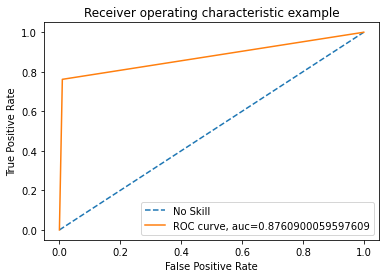

In [27]:
# predict probabilities
yhat_15 = gnb.predict_proba(x_test_15)#[::,1]
# retrieve just the probabilities for the positive class
pos_probs_15 = yhat_15[:, 1]
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test_15,  y_pred_15) #fpr, tpr = false positive rate , true positive rate
# calculate roc score for model
auc_15 = roc_auc_score(y_test_15, y_pred_15) #should we be using predicted value or predicted prob instead to build the auc?
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc_15))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc=4)
plt.show()

In [47]:
#check for the classification report
print(classification_report(y_test_15,y_pred_15))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89     84730
           1       0.99      0.76      0.86     85222

    accuracy                           0.88    169952
   macro avg       0.90      0.88      0.87    169952
weighted avg       0.90      0.88      0.87    169952



#### Step - 8: Check with all the metrics in order to compare at once for each classifier

In [44]:
#Check for Accuracy score per classifier
log_reg_acc = accuracy_score(y_pred_ro, y_test_ro)*100
dtc_acc = accuracy_score(y_pred_3, y_test_3)*100
rfc_acc = accuracy_score(y_pred_6, y_test_6)*100
knn_acc = accuracy_score(y_pred_9, y_test_9)*100
xgb_acc = accuracy_score(y_pred_12, y_test_12)*100
gnb_acc = accuracy_score(y_pred_15, y_test_15)*100
print(f"log_reg_acc : {log_reg_acc}")
print("\n")
print(f"dtc_acc: {dtc_acc}")
print("\n")
print(f"rfc_acc: {rfc_acc}")
print("\n")
print(f"knn_acc: {knn_acc}")
print("\n")
print(f"xgb_acc: {xgb_acc}")
print("\n")
print(f"gnb_acc : {gnb_acc}")

log_reg_acc : 93.77942007154961


dtc_acc: 99.97057992845039


rfc_acc: 99.9929391828281


knn_acc: 99.93998305403878


xgb_acc: 99.98882037281115


gnb_acc : 87.57590378459801


In [46]:
#Check for roc_auc_score per classifier
log_reg_roc = roc_auc_score(y_pred_ro, y_test_ro)
dtc_roc = roc_auc_score(y_pred_3, y_test_3)
rfc_roc = roc_auc_score(y_pred_6, y_test_6)
knn_roc = roc_auc_score(y_pred_9, y_test_9)
xgb_roc = roc_auc_score(y_pred_12, y_test_12)
gnb_roc = roc_auc_score(y_pred_15, y_test_15)
print(f"log_reg_roc : {log_reg_roc}")
print("\n")
print(f"dtc_roc : {dtc_roc}")
print("\n")
print(f"rfc_roc : {rfc_roc}")
print("\n")
print(f"knn_roc : {knn_roc}")
print("\n")
print(f"xgb_roc : {xgb_roc}")
print("\n")
print(f"gnb_roc : {gnb_roc}")

log_reg_roc : 0.9388166226357336


dtc_roc : 0.9997068205272539


rfc_roc : 0.9999296055564681


knn_roc : 0.9994022783741972


xgb_roc : 0.9998885512840066


gnb_roc : 0.8964197158728477


In [47]:
#Check for precision score per classifier
log_reg_prc = precision_score(y_pred_ro, y_test_ro)
dtc_prc = precision_score(y_pred_3, y_test_3)
rfc_prc = precision_score(y_pred_6, y_test_6)
knn_prc = precision_score(y_pred_9, y_test_9)
xgb_prc = precision_score(y_pred_12, y_test_12)
gnb_prc = precision_score(y_pred_15, y_test_15)
print(f"log_reg_prc : {log_reg_prc}")
print("\n")
print(f"dtc_prc : {dtc_prc}")
print("\n")
print(f"rfc_prc : {rfc_prc}")
print("\n")
print(f"knn_prc : {knn_prc}")
print("\n")
print(f"xgb_prc : {xgb_prc}")
print("\n")
print(f"gnb_prc : {gnb_prc}")

log_reg_prc : 0.9132735678580648


dtc_prc : 1.0


rfc_prc : 1.0


knn_prc : 1.0


xgb_prc : 1.0


gnb_prc : 0.7617633944286687


In [51]:
#Check for recall score per classifier
log_reg_rcs = recall_score(y_pred_ro, y_test_ro)
dtc_rcs = recall_score(y_pred_3, y_test_3)
rfc_rcs = recall_score(y_pred_6, y_test_6)
knn_rcs = recall_score(y_pred_9, y_test_9)
xgb_rcs = recall_score(y_pred_12, y_test_12)
gnb_rcs = recall_score(y_pred_15, y_test_15)
print(f"log_reg_rcs : {log_reg_rcs}")
print("\n")
print(f"dtc_rcs : {dtc_rcs}")
print("\n")
print(f"rfc_rcs : {rfc_rcs}")
print("\n")
print(f"knn_rcs : {knn_rcs}")
print("\n")
print(f"xgb_rcs : {xgb_rcs}")
print("\n")
print(f"gnb_rcs : {gnb_rcs}")

log_reg_rcs : 0.9607342122154743


dtc_rcs : 0.9994136410545079


rfc_rcs : 0.9998592111129362


knn_rcs : 0.9988045567483943


xgb_rcs : 0.999777102568013


gnb_rcs : 0.987646620316137


In [49]:
#Check for F1 score
log_reg_f1sc = f1_score(y_pred_ro, y_test_ro)
dtc_f1sc = f1_score(y_pred_3, y_test_3)
rfc_f1sc = f1_score(y_pred_6, y_test_6)
knn_f1sc = f1_score(y_pred_9, y_test_9)
xgb_f1sc = f1_score(y_pred_12, y_test_12)
gnb_f1sc = f1_score(y_pred_15, y_test_15)
print(f"log_reg_f1sc : {log_reg_f1sc}")
print("\n")
print(f"dtc_f1sc : {dtc_f1sc}")
print("\n")
print(f"rfc_f1sc : {rfc_f1sc}")
print("\n")
print(f"knn_f1sc : {knn_f1sc}")
print("\n")
print(f"xgb_f1sc : {xgb_f1sc}")
print("\n")
print(f"gnb_f1sc : {gnb_f1sc}")

log_reg_f1sc : 0.9364029019334191


dtc_f1sc : 0.9997067345478434


rfc_f1sc : 0.9999296006007415


knn_f1sc : 0.9994019208893787


xgb_f1sc : 0.9998885388618057


gnb_f1sc : 0.8601220247361763


In [50]:
#Compare results of different metrics based on each classifier

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
              'Random Forest','KNN','XGBoost' ,'Naive Bayes'],
    'Accuracy_Score': [log_reg_acc,
                       dtc_acc,
                       rfc_acc,
                       knn_acc,
                       xgb_acc,
                       gnb_acc],
    'ROC_AUC_Score' :[log_reg_roc,
              dtc_roc,
              rfc_roc,
              knn_roc,
              xgb_roc,
              gnb_roc],
    'Precision_Score': [log_reg_prc,
              dtc_prc,
              rfc_prc,
              knn_prc,
              xgb_prc,
              gnb_prc],
    'Recall_Score': [log_reg_rcs,
              dtc_rcs,
              rfc_rcs,
              knn_rcs,
              xgb_rcs,
              gnb_rcs],
    'F1_Score' : [log_reg_f1sc,
              dtc_f1sc,
              rfc_f1sc,
              knn_f1sc,
              xgb_f1sc,
              gnb_f1sc]})
result_df = results.sort_values(by='Accuracy_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Accuracy_Score,ROC_AUC_Score,Precision_Score,Recall_Score,F1_Score
Model,,,,,
Random Forest,99.992939,0.999930,1.000000,0.999859,0.999930
XGBoost,99.988820,0.999889,1.000000,0.999777,0.999889
Decision Tree,99.970580,0.999707,1.000000,0.999414,0.999707
KNN,99.939983,0.999402,1.000000,0.998805,0.999402
Logistic Regression,93.779420,0.938817,0.913274,0.960734,0.936403
Naive Bayes,87.575904,0.896420,0.761763,0.987647,0.860122


In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_knn, acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, xgb_train_time, rfc_train_time, 
                         svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

In [45]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 
              'Random Forest','KNN','XGBoost' ,'Naive Bayes'],
    'Accuracy_Score': [log_reg_acc,
                       dtc_acc,
                       rfc_acc,
                       knn_acc,
                       xgb_acc,
                       gnb_acc],
    'ROC_AUC_Score' :[log_reg_roc,
              dtc_roc,
              rfc_roc,
              knn_roc,
              xgb_roc,
              gnb_roc],
    'Precision_Score': [log_reg_prc,
              dtc_prc,
              rfc_prc,
              knn_prc,
              xgb_prc,
              gnb_prc],
    'Recall_Score': [log_reg_rcs,
              dtc_rcs,
              rfc_rcs,
              knn_rcs,
              xgb_rcs,
              gnb_rcs],
    'F1_Score' : [log_reg_f1sc,
              dtc_f1sc,
              rfc_f1sc,
              knn_f1sc,
              xgb_f1sc,
              gnb_f1sc]})
result_df = results.sort_values(by='Accuracy_Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Accuracy_Score,ROC_AUC_Score,Precision_Score,Recall_Score,F1_Score
Model,,,,,
Random Forest,99.992939,0.999930,1.000000,0.999859,0.999930
XGBoost,99.988820,0.999889,1.000000,0.999777,0.999889
Decision Tree,99.970580,0.999707,1.000000,0.999414,0.999707
KNN,99.939983,0.999402,1.000000,0.998805,0.999402
Logistic Regression,93.779420,0.938817,0.913274,0.960734,0.936403
Naive Bayes,87.575904,0.896420,0.761763,0.987647,0.860122


## Conclusion
### As per all the scores of each Algorithm being considered, the Random Forest gives the best Score of all.
### Hence it is to be chosen as the best method for this problem